In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import time
from tqdm import tqdm
import os, sys
import json
from itables import show
from mplsoccer import Pitch, VerticalPitch

## Definir el path donde están los datos
path = 'C:/Users/derwi/OneDrive/Documentos/japon/' ##Cambiar

# Supongamos que trabajamos para el Machida Zelvia. Acaba de suceder la fecha 15 y el cuerpo técnico le ha pedido un informe sobre el próximo rival.

In [2]:
## Tabla de partidos
table_matches = pd.read_csv(path+'table_matches.csv')
table_matches_week = table_matches[['match_id','match_week','fixture_name']].copy()

## Tabla de eventos
table_events = pd.read_parquet(path+'table_events_J1_2024.parquet.gzip')

## Como estamos suponiendo que vamos en la semana 15, debemos borrar los partidos de la semana 16 en adelante
table_events = pd.merge(table_events,table_matches_week,on='match_id',how='left')
table_events = table_events[table_events['match_week']<16].reset_index(drop=True)

table_events['group_position'] = np.where(table_events['position.name'].isin(['Right Center Back','Center Back','Left Center Back']),'Central Defender',
                                                 np.where(table_events['position.name'].isin(['Left Back','Left Wing Back','Right Back','Right Wing Back']),'Full Back',
                                                                 np.where(table_events['position.name'].isin(['Right Defensive Midfield','Left Defensive Midfield','Center Defensive Midfield',
                                                                                                              'Center Midfield','Right Center Midfield','Left Center Midfield']),'Center Midfielder',
                                                                                 np.where(table_events['position.name'].isin(['Center Attacking Midfield','Right Attacking Midfield','Left Attacking Midfield']),'Attacking Midfielder',
                                                                                         np.where(table_events['position.name'].isin(['Right Wing','Left Wing','Left Midfield','Right Midfield']),'Wide player',
                                                                                                 np.where(table_events['position.name'].isin(['Center Forward','Left Center Forward','Right Center Forward']),'Forward',
                                                                                                         np.where(table_events['position.name'].isin(['Goalkeeper']),'Goalkeeper',None
                                                                                                                 )))))))
table_events['group_position_ab'] = np.where(table_events['position.name'].isin(['Right Center Back','Center Back','Left Center Back']),'CB',
                                                 np.where(table_events['position.name'].isin(['Left Back','Left Wing Back','Right Back','Right Wing Back']),'FB',
                                                                 np.where(table_events['position.name'].isin(['Right Defensive Midfield','Left Defensive Midfield','Center Defensive Midfield',
                                                                                                              'Center Midfield','Right Center Midfield','Left Center Midfield']),'CM',
                                                                                 np.where(table_events['position.name'].isin(['Center Attacking Midfield','Right Attacking Midfield','Left Attacking Midfield']),'AM',
                                                                                         np.where(table_events['position.name'].isin(['Right Wing','Left Wing','Left Midfield','Right Midfield']),'WA',
                                                                                                 np.where(table_events['position.name'].isin(['Center Forward','Left Center Forward','Right Center Forward']),'CF',
                                                                                                         np.where(table_events['position.name'].isin(['Goalkeeper']),'GK',None
                                                                                                                 )))))))


table_events

,id,index,period,timestamp,minute,second,possession,duration,related_events,location,...,pass_endx,pass_endy,carry_endx,carry_endy,shot_endx,shot_endy,match_week,fixture_name,group_position,group_position_ab
0,dc3ab916-a99b-4c6a-bc33-05438da5174e,1,1,00:00:00.000,0,0,1,0.0000,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,1,Week 1 - Tokyo Verdy vs Yokohama F. Marinos,None,None
1,ccd9824e-af1b-4cd2-b60b-d3df513c7962,2,1,00:00:00.000,0,0,1,0.0000,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,1,Week 1 - Tokyo Verdy vs Yokohama F. Marinos,None,None
2,7d0b7d53-4385-42f3-bd41-f220f8c6dd2c,3,1,00:00:00.000,0,0,1,0.0000,d76c122e-efc5-4c4a-8461-6fa35e6350d1,None,...,NaN,NaN,NaN,NaN,NaN,NaN,1,Week 1 - Tokyo Verdy vs Yokohama F. Marinos,None,None
3,d76c122e-efc5-4c4a-8461-6fa35e6350d1,4,1,00:00:00.000,0,0,1,0.0000,7d0b7d53-4385-42f3-bd41-f220f8c6dd2c,None,...,NaN,NaN,NaN,NaN,NaN,NaN,1,Week 1 - Tokyo Verdy vs Yokohama F. Marinos,None,None
4,51adb4a2-f245-48f6-805f-fef9a010388c,5,1,00:00:00.160,0,0,2,2.3528,71bed387-4690-490f-b758-445107d6fe59,"[60.0, 40.0]",...,34.7,28.0,NaN,NaN,NaN,NaN,1,Week 1 - Tokyo Verdy vs Yokohama F. Marinos,Forward,CF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507978,9b224577-90e6-4807-991f-7739b7c77cc6,3691,2,00:52:37.392,97,37,199,2.4848,"['5e391a76-64ad-4a27-8cb7-0aac899c0b0d', 'ee8e...","[80.3, 22.6]",...,NaN,NaN,74.1,25.2,NaN,NaN,1,Week 1 - Sanfrecce Hiroshima vs Urawa Reds,Wide player,WA
507979,5e391a76-64ad-4a27-8cb7-0aac899c0b0d,3692,2,00:52:38.733,97,38,199,1.1447,"['ee8e31bd-8d6a-490e-8c40-819357245b68', '9b22...","[40.7, 55.5]",...,NaN,NaN,NaN,NaN,NaN,NaN,1,Week 1 - Sanfrecce Hiroshima vs Urawa Reds,Full Back,FB
507980,ee8e31bd-8d6a-490e-8c40-819357245b68,3693,2,00:52:39.877,97,39,199,0.9747,5e391a76-64ad-4a27-8cb7-0aac899c0b0d,"[74.1, 25.2]",...,71.9,14.1,NaN,NaN,NaN,NaN,1,Week 1 - Sanfrecce Hiroshima vs Urawa Reds,Wide player,WA
507981,bbeb8172-4b3d-4efc-899c-6d201d85659b,3694,2,00:52:40.180,97,40,199,0.0000,856e1c3e-0215-4e22-bb76-4786030fb72d,None,...,NaN,NaN,NaN,NaN,NaN,NaN,1,Week 1 - Sanfrecce Hiroshima vs Urawa Reds,None,None


In [3]:
id_team = 4609
id_round = 16

## Info próximo partido
next_match = table_matches[(table_matches['match_week']==id_round) & ((table_matches['home_team.home_team_id']==id_team)|(table_matches['away_team.away_team_id']==id_team))].reset_index(drop=True)
match_id = next_match['match_id'][0]
fixture_name = next_match['fixture_name'][0]
venue =  np.where(next_match['home_team.home_team_id']==id_team,'Home','Away')[0]
id_oppteam = np.where(next_match['home_team.home_team_id']==id_team,next_match['away_team.away_team_id'],next_match['home_team.home_team_id'])[0]

fixture_name

'Week 16 - Urawa Reds vs FC Machida Zelvia'

## Como construye juego desde propio campo?

Calculamos las metricas:

In [4]:
df = table_events.copy()
metricas_pp = pd.DataFrame({
    'match_id' : df['match_id'],
    'team.id' : df['team.id'],
    'team.name' : df['team.name'],
    'OP Pass Own Half' : (df['type.name']=='Pass') & (df['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & (df['x']<60),
    'OP Longballs Own Half': (df['type.name']=='Pass') & (df['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & (df['pass.height.name']=='High Pass') & (df['x']<60) & (df['pass_endx']>80),
    'OP Longballs Succ Own Half': (df['type.name']=='Pass') & (df['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & (df['pass.height.name']=='High Pass') & (df['x']<60) & (df['pass_endx']>80) & (df['pass.outcome.name'].isna()),
    'OP Progressive Pass Own Half':(df['type.name']=='Pass') & (df['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & (df['x']<60) & (df['pass_endx'] - df['x']>10),
    'OP Progressive Pass Succ Own Half':(df['type.name']=='Pass') & (df['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & (df['x']<60) & (df['pass_endx'] - df['x']>10) & (df['pass.outcome.name'].isna()),
    'OP Pass OBV Own Half' : np.where((df['type.name']=='Pass') & (df['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & (df['x']<60),df['obv_total_net'],0),
    'OP Pass Own Half to Final Third' : (df['type.name']=='Pass') & (df['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & (df['x']<60) & (df['pass_endx']>80),
    'OP Pass Own Half to Final Third Succ' : (df['type.name']=='Pass') & (df['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & (df['x']<60) & (df['pass_endx']>80) & (df['pass.outcome.name'].isna()),
    'Goal Kick Longballs': (df['type.name']=='Pass') & (df['pass.type.name'].isin(['Goal Kick'])) & (df['pass.height.name']=='High Pass') & (df['pass_endx']>60),
           
})
## Numero de partidos
metricas_n = metricas_pp[['team.id','team.name','match_id']].groupby(['team.id','team.name'])['match_id'].nunique().reset_index().rename(columns={'match_id':'Games'})

## Métricas agrgadas por partido
metricas_sum = metricas_pp.drop(columns='match_id').groupby(['team.id','team.name']).sum().reset_index()

metricas_final = pd.merge(metricas_n,metricas_sum,on=['team.id','team.name'],how='left')
metricas_final

,team.id,team.name,Games,OP Pass Own Half,OP Longballs Own Half,OP Longballs Succ Own Half,OP Progressive Pass Own Half,OP Progressive Pass Succ Own Half,OP Pass OBV Own Half,OP Pass Own Half to Final Third,OP Pass Own Half to Final Third Succ,Goal Kick Longballs
0,1880,Yokohama F. Marinos,15,3892,168,52,1617,1172,2.098418,209,78,12
1,1881,Kashima Antlers,15,3312,225,60,1549,972,2.787998,261,82,55
2,1882,Urawa Reds,15,4724,205,58,1667,1151,2.367102,253,89,37
3,1884,Nagoya Grampus,15,3126,207,59,1347,801,1.851828,243,83,114
4,1885,Gamba Osaka,15,3452,219,62,1465,926,2.736400,269,91,62
5,1886,Vissel Kobe,15,2728,256,88,1300,765,4.002230,290,108,87
6,1888,Tokyo,15,3520,179,45,1407,864,2.092896,218,63,58
7,1889,Sanfrecce Hiroshima,15,2927,259,66,1480,865,3.640101,294,84,78
8,1890,Kashiwa Reysol,15,2949,200,31,1319,770,2.814695,233,49,41
9,1891,Cerezo Osaka,15,3579,282,74,1389,826,2.882922,306,88,75


Normalicemos las metricas:

In [5]:
metricas_final['OP Pass Own Half p90'] = metricas_final['OP Pass Own Half']/metricas_final['Games']
metricas_final['OP Longballs Own Half (%)'] = metricas_final['OP Longballs Own Half']/metricas_final['OP Pass Own Half']
metricas_final['OP Progressive Pass Own Half (%)'] = metricas_final['OP Progressive Pass Own Half']/metricas_final['OP Pass Own Half']
metricas_final['OP Pass Own Half to Final Third (%)'] = metricas_final['OP Pass Own Half to Final Third']/metricas_final['OP Pass Own Half']
metricas_final['OP Progressive Pass Succ Rate Own Half (%)'] = metricas_final['OP Progressive Pass Succ Own Half']/metricas_final['OP Progressive Pass Own Half']
metricas_final['OP Pass Own Half to Final Third Succ Rate (%)'] = metricas_final['OP Pass Own Half to Final Third Succ']/metricas_final['OP Pass Own Half to Final Third']
metricas_final

,team.id,team.name,Games,OP Pass Own Half,OP Longballs Own Half,OP Longballs Succ Own Half,OP Progressive Pass Own Half,OP Progressive Pass Succ Own Half,OP Pass OBV Own Half,OP Pass Own Half to Final Third,OP Pass Own Half to Final Third Succ,Goal Kick Longballs,OP Pass Own Half p90,OP Longballs Own Half (%),OP Progressive Pass Own Half (%),OP Pass Own Half to Final Third (%),OP Progressive Pass Succ Rate Own Half (%),OP Pass Own Half to Final Third Succ Rate (%)
0,1880,Yokohama F. Marinos,15,3892,168,52,1617,1172,2.098418,209,78,12,259.466667,0.043165,0.415468,0.053700,0.724799,0.373206
1,1881,Kashima Antlers,15,3312,225,60,1549,972,2.787998,261,82,55,220.800000,0.067935,0.467693,0.078804,0.627502,0.314176
2,1882,Urawa Reds,15,4724,205,58,1667,1151,2.367102,253,89,37,314.933333,0.043395,0.352879,0.053556,0.690462,0.351779
3,1884,Nagoya Grampus,15,3126,207,59,1347,801,1.851828,243,83,114,208.400000,0.066219,0.430902,0.077735,0.594655,0.341564
4,1885,Gamba Osaka,15,3452,219,62,1465,926,2.736400,269,91,62,230.133333,0.063441,0.424392,0.077926,0.632082,0.338290
5,1886,Vissel Kobe,15,2728,256,88,1300,765,4.002230,290,108,87,181.866667,0.093842,0.476540,0.106305,0.588462,0.372414
6,1888,Tokyo,15,3520,179,45,1407,864,2.092896,218,63,58,234.666667,0.050852,0.399716,0.061932,0.614072,0.288991
7,1889,Sanfrecce Hiroshima,15,2927,259,66,1480,865,3.640101,294,84,78,195.133333,0.088487,0.505637,0.100444,0.584459,0.285714
8,1890,Kashiwa Reysol,15,2949,200,31,1319,770,2.814695,233,49,41,196.600000,0.067820,0.447270,0.079010,0.583776,0.210300
9,1891,Cerezo Osaka,15,3579,282,74,1389,826,2.882922,306,88,75,238.600000,0.078793,0.388097,0.085499,0.594672,0.287582


Ahora empezamos a mostrar las graficas. Existen muchas formas de presentar la informacion, por lo que te voy a compartir las mas usadas (barras y scatterplots).

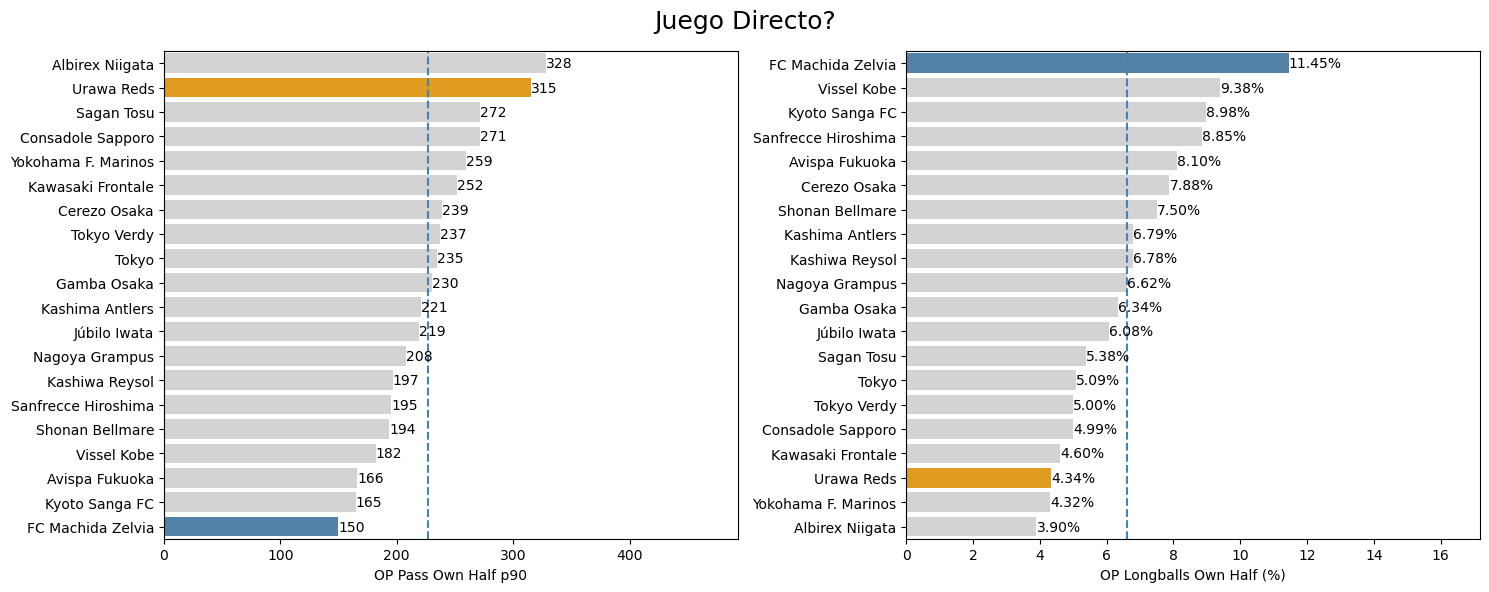

In [6]:
fig, axes = plt.subplots(1, 2,figsize=(15, 6))

fig.suptitle('Juego Directo?',size=18)

column = 'OP Pass Own Half p90'

df = metricas_final.copy()
df = df.sort_values(column,ascending=False).reset_index(drop=True)
df['team_Opp'] = np.where(df['team.id']==id_oppteam,'Opp',
                          np.where(df['team.id']==id_team,'Team','Other'))
palette_custom = {'Other':'lightgray','Opp':'orange','Team':'steelblue'}

plot_avg = sns.barplot(x=df[column], y=df['team.name'],hue=df['team_Opp'],legend=False,palette=palette_custom,ax=axes[0])
for i in range(len(plot_avg.containers)):
    plot_avg.bar_label(plot_avg.containers[i],fmt='%.0f')
plot_avg.set(ylabel='',xlim=(0,df[column].max()*1.5))
plot_avg.axvline(x=df[column].mean(), linestyle='--',color='steelblue')

column = 'OP Longballs Own Half (%)'

df = metricas_final.copy()
df = df.sort_values(column,ascending=False).reset_index(drop=True)
df['team_Opp'] = np.where(df['team.id']==id_oppteam,'Opp',
                          np.where(df['team.id']==id_team,'Team','Other'))
palette_custom = {'Other':'lightgray','Opp':'orange','Team':'steelblue'}

plot_avg = sns.barplot(x=df[column]*100, y=df['team.name'],hue=df['team_Opp'],legend=False,palette=palette_custom,ax=axes[1])
for i in range(len(plot_avg.containers)):
    plot_avg.bar_label(plot_avg.containers[i],fmt='%.2f%%')
plot_avg.set(ylabel='',xlim=(0,df[column].max()*150))
plot_avg.axvline(x=df[column].mean()*100, linestyle='--',color='steelblue')

fig.tight_layout()
plt.show()

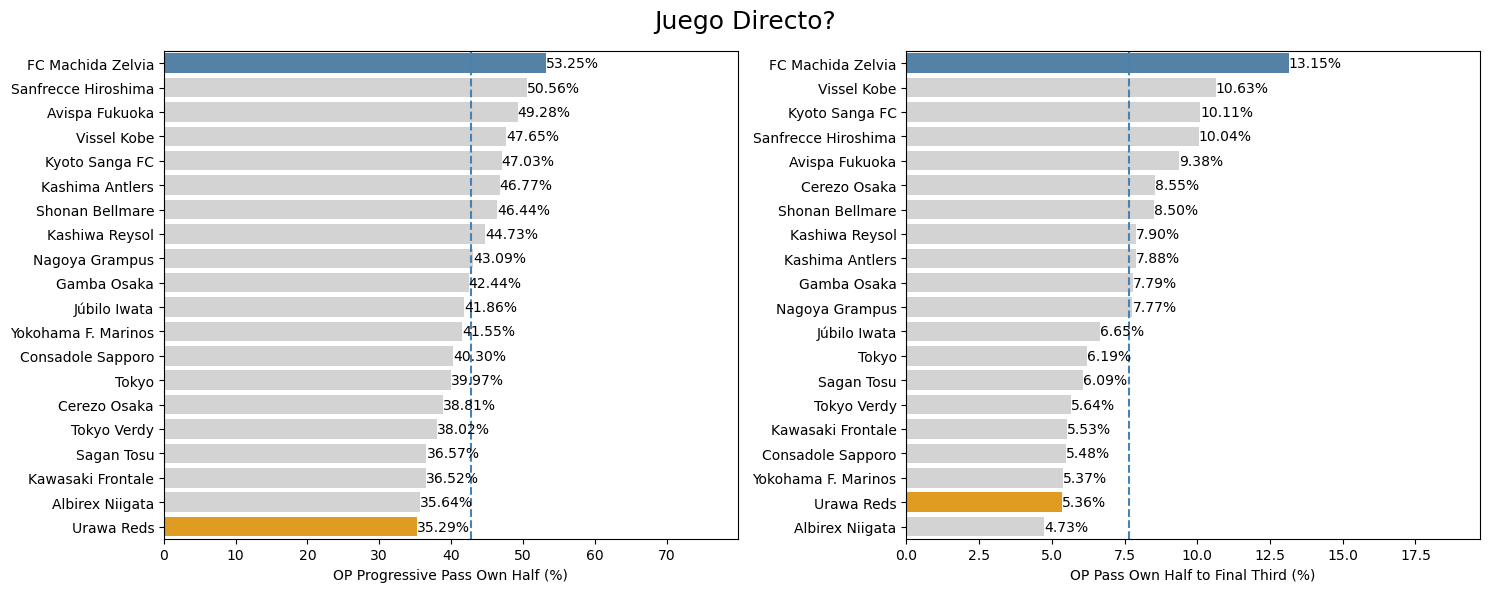

In [7]:
fig, axes = plt.subplots(1, 2,figsize=(15, 6))

fig.suptitle('Juego Directo?',size=18)

column = 'OP Progressive Pass Own Half (%)'

df = metricas_final.copy()
df = df.sort_values(column,ascending=False).reset_index(drop=True)
df['team_Opp'] = np.where(df['team.id']==id_oppteam,'Opp',
                          np.where(df['team.id']==id_team,'Team','Other'))
palette_custom = {'Other':'lightgray','Opp':'orange','Team':'steelblue'}

plot_avg = sns.barplot(x=df[column]*100, y=df['team.name'],hue=df['team_Opp'],legend=False,palette=palette_custom,ax=axes[0])
for i in range(len(plot_avg.containers)):
    plot_avg.bar_label(plot_avg.containers[i],fmt='%.2f%%')
plot_avg.set(ylabel='',xlim=(0,df[column].max()*150))
plot_avg.axvline(x=df[column].mean()*100, linestyle='--',color='steelblue')

column = 'OP Pass Own Half to Final Third (%)'

df = metricas_final.copy()
df = df.sort_values(column,ascending=False).reset_index(drop=True)
df['team_Opp'] = np.where(df['team.id']==id_oppteam,'Opp',
                          np.where(df['team.id']==id_team,'Team','Other'))
palette_custom = {'Other':'lightgray','Opp':'orange','Team':'steelblue'}

plot_avg = sns.barplot(x=df[column]*100, y=df['team.name'],hue=df['team_Opp'],legend=False,palette=palette_custom,ax=axes[1])
for i in range(len(plot_avg.containers)):
    plot_avg.bar_label(plot_avg.containers[i],fmt='%.2f%%')
plot_avg.set(ylabel='',xlim=(0,df[column].max()*150))
plot_avg.axvline(x=df[column].mean()*100, linestyle='--',color='steelblue')

fig.tight_layout()
plt.show()

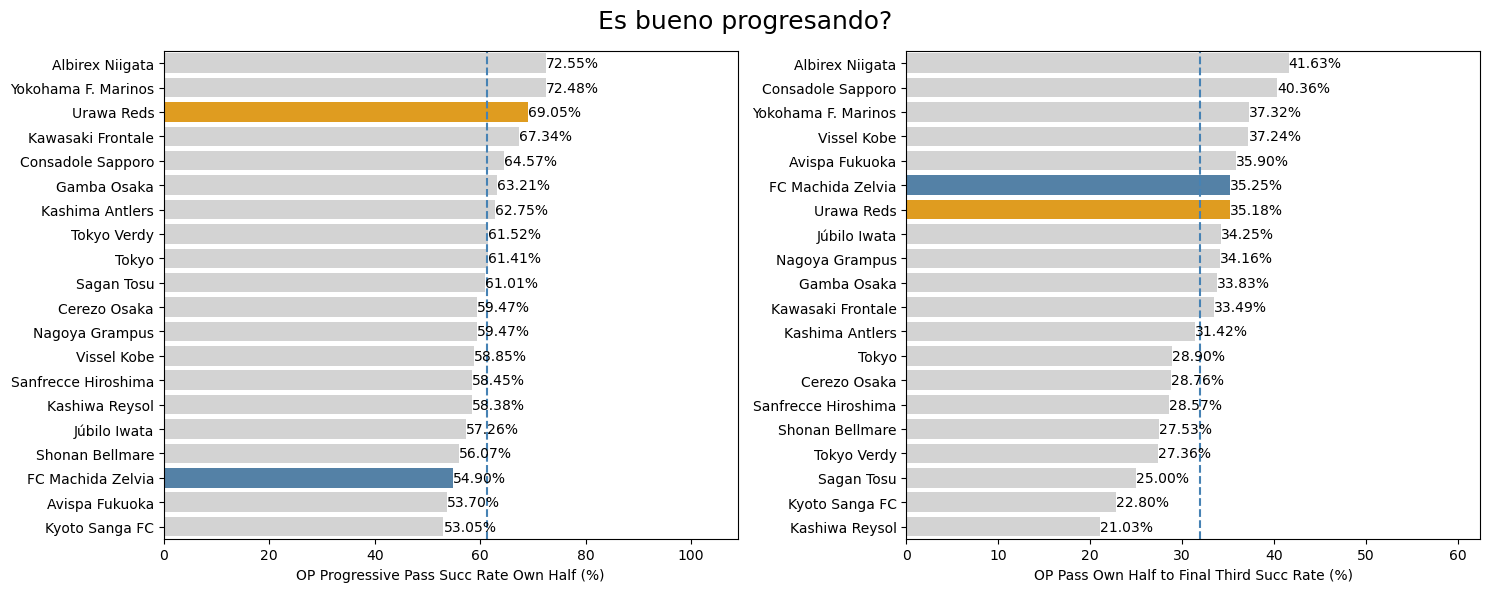

In [8]:
fig, axes = plt.subplots(1, 2,figsize=(15, 6))

fig.suptitle('Es bueno progresando?',size=18)

column = 'OP Progressive Pass Succ Rate Own Half (%)'

df = metricas_final.copy()
df = df.sort_values(column,ascending=False).reset_index(drop=True)
df['team_Opp'] = np.where(df['team.id']==id_oppteam,'Opp',
                          np.where(df['team.id']==id_team,'Team','Other'))
palette_custom = {'Other':'lightgray','Opp':'orange','Team':'steelblue'}

plot_avg = sns.barplot(x=df[column]*100, y=df['team.name'],hue=df['team_Opp'],legend=False,palette=palette_custom,ax=axes[0])
for i in range(len(plot_avg.containers)):
    plot_avg.bar_label(plot_avg.containers[i],fmt='%.2f%%')
plot_avg.set(ylabel='',xlim=(0,df[column].max()*150))
plot_avg.axvline(x=df[column].mean()*100, linestyle='--',color='steelblue')

column = 'OP Pass Own Half to Final Third Succ Rate (%)'

df = metricas_final.copy()
df = df.sort_values(column,ascending=False).reset_index(drop=True)
df['team_Opp'] = np.where(df['team.id']==id_oppteam,'Opp',
                          np.where(df['team.id']==id_team,'Team','Other'))
palette_custom = {'Other':'lightgray','Opp':'orange','Team':'steelblue'}

plot_avg = sns.barplot(x=df[column]*100, y=df['team.name'],hue=df['team_Opp'],legend=False,palette=palette_custom,ax=axes[1])
for i in range(len(plot_avg.containers)):
    plot_avg.bar_label(plot_avg.containers[i],fmt='%.2f%%')
plot_avg.set(ylabel='',xlim=(0,df[column].max()*150))
plot_avg.axvline(x=df[column].mean()*100, linestyle='--',color='steelblue')

fig.tight_layout()
plt.show()

Ahora hagamos el scatterplot:

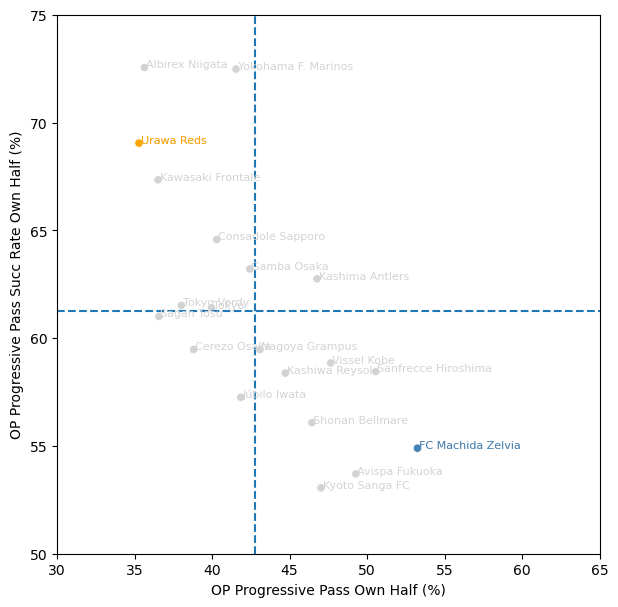

In [9]:
plt.figure(figsize=(7,7))
df = metricas_final.copy()
df['team_Opp'] = np.where(df['team.id']==id_oppteam,'Opp',
                          np.where(df['team.id']==id_team,'Team','Other'))

column1 = 'OP Progressive Pass Own Half (%)'
column2 = 'OP Progressive Pass Succ Rate Own Half (%)'

palette_custom = {'Other':'lightgray','Opp':'orange','Team':'steelblue'}

plot_metric= sns.scatterplot(x=df[column1]*100,y=df[column2]*100,hue=df['team_Opp'],palette=palette_custom,legend=False)
plt.axvline(x=df[column1].mean()*100,linestyle='--')
plt.axhline(y=df[column2].mean()*100,linestyle='--')


for i in range(len(df)):
    plt.text(x=df[column1][i]*100+0.1, y=df[column2][i]*100, s=df['team.name'][i],size=8,color='lightgray')

plt.text(x=df[df['team.id']==id_oppteam][column1].to_list()[0]*100+0.1, y=df[df['team.id']==id_oppteam][column2].to_list()[0]*100, s=df[df['team.id']==id_oppteam]['team.name'].to_list()[0],size=8,color='orange')
plt.text(x=df[df['team.id']==id_team][column1].to_list()[0]*100+0.1, y=df[df['team.id']==id_team][column2].to_list()[0]*100, s=df[df['team.id']==id_team]['team.name'].to_list()[0],size=8,color='steelblue')
plot_metric.set(xlim=(30,65),ylim=(50,75))
plt.show()

Ahora, ademas de estos graficos, pueden aparecer necesidades mucho mas especificas que para resolverlas requerimos graficos de lineas o heatmpas. Veamos:

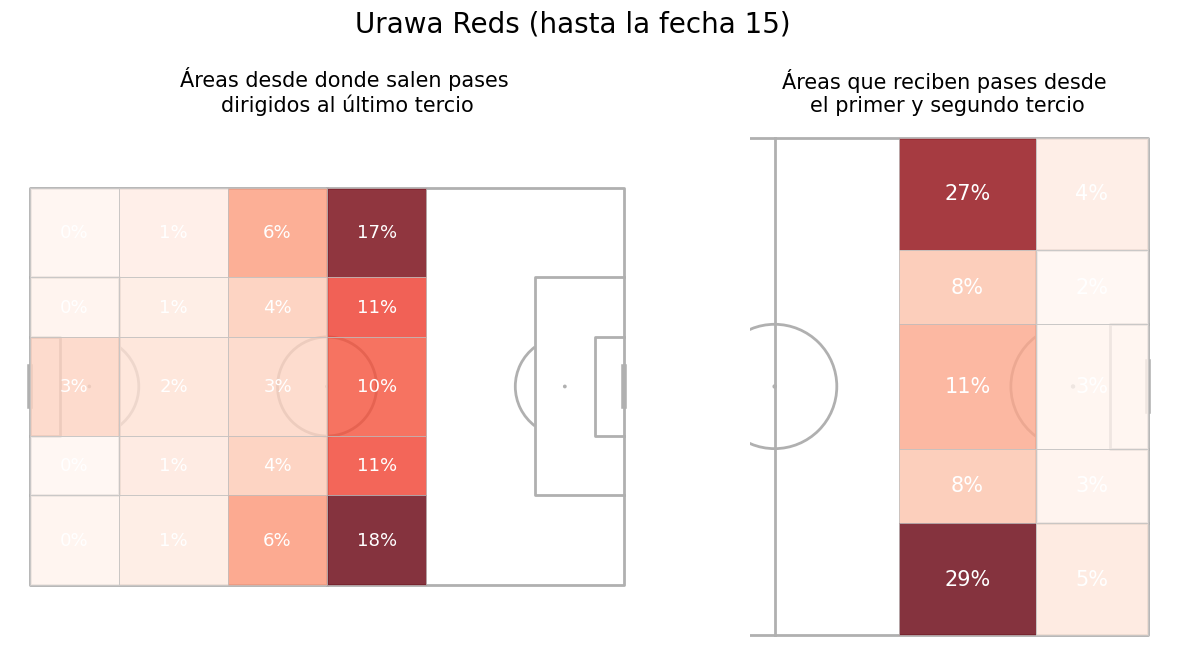

In [10]:
deep_prog_pass = table_events[(table_events['type.name']=='Pass') & (table_events['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & (table_events['x']<80) & (table_events['pass_endx']>80)]
deep_prog_pass_opp = deep_prog_pass[(deep_prog_pass['team.id']==id_oppteam)].reset_index(drop=True)

fig, axs = plt.subplots(ncols=2, figsize=(15, 10),width_ratios=[1.5, 1])

pitch = Pitch()
pitch.draw(axs[0],figsize=(10, 20))
bin_x = np.sort(np.array([0,18,40,60,80]))
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,pitch.dim.penalty_area_bottom,
                          pitch.dim.penalty_area_top,pitch.dim.six_yard_top, pitch.dim.top]))
bin_statistic = pitch.bin_statistic(deep_prog_pass_opp['x'], deep_prog_pass_opp['y'], statistic='count',
                                    bins=(bin_x, bin_y), normalize=True)
pitch.heatmap(bin_statistic, ax=axs[0], cmap='Reds', edgecolor='silver',linewidth=0.5,alpha=0.8)
labels = pitch.label_heatmap(bin_statistic, color='white', fontsize=13,
                             ax=axs[0], ha='center', va='center',
                             str_format='{:.0%}')
fig.text(x=0.35,y=0.77,s='Áreas desde donde salen pases \ndirigidos al último tercio',ha='center',size=15)

pitch = Pitch(half=True)
pitch.draw(axs[1],figsize=(5, 5))
bin_x = np.sort(np.array([80,102,120]))
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,pitch.dim.penalty_area_bottom,
                          pitch.dim.penalty_area_top,pitch.dim.six_yard_top, pitch.dim.top]))
bin_statistic = pitch.bin_statistic(deep_prog_pass_opp['pass_endx'], deep_prog_pass_opp['pass_endy'], 
                                    statistic='count',bins=(bin_x, bin_y), normalize=True)
pitch.heatmap(bin_statistic, ax=axs[1], cmap='Reds', edgecolor='silver',linewidth=0.5,alpha=0.8)
labels = pitch.label_heatmap(bin_statistic, color='white', fontsize=15,
                             ax=axs[1], ha='center', va='center',
                             str_format='{:.0%}')
fig.text(x=0.75,y=0.77,s='Áreas que reciben pases desde \nel primer y segundo tercio',ha='center',size=15)
fig.text(x=0.5,y=0.85,s='{} (hasta la fecha {})'.format(deep_prog_pass_opp['team.name'][0],id_round-1),ha='center',size=20)
plt.show()

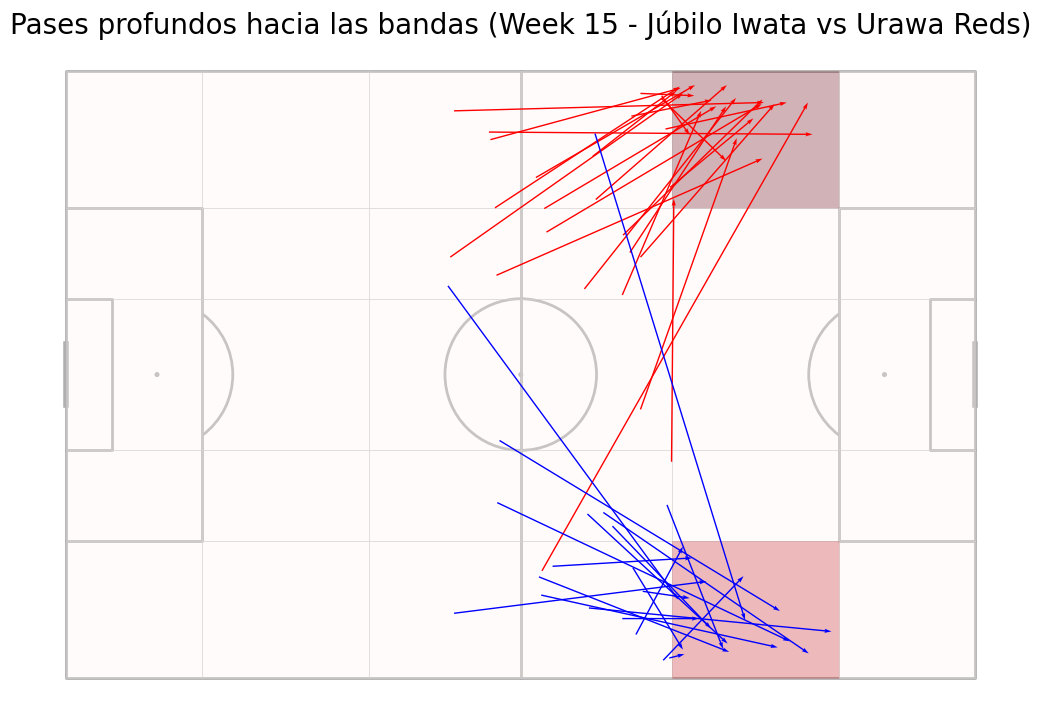

In [11]:
deep_prog_pass = table_events[(table_events['type.name']=='Pass') & (table_events['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & (table_events['x']<80) & (table_events['pass_endx']>80)]
deep_prog_pass_opp = deep_prog_pass[(deep_prog_pass['team.id']==id_oppteam)&(deep_prog_pass['match_week']==id_round-1)].reset_index(drop=True)

df_pass = deep_prog_pass_opp[(deep_prog_pass_opp['pass_endx'].between(80,102))&(deep_prog_pass_opp['pass_endy'].between(0,18))].reset_index(drop=True)
df_pass2 = deep_prog_pass_opp[(deep_prog_pass_opp['pass_endx'].between(80,102))&(deep_prog_pass_opp['pass_endy'].between(62,80))].reset_index(drop=True)
df_both = pd.concat([df_pass,df_pass2])

pitch = Pitch()
fig,ax = pitch.draw(figsize=(10, 10))
bin_x = np.sort(np.array([0,18,40,60,80,102,120]))
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,pitch.dim.penalty_area_bottom,
                          pitch.dim.penalty_area_top,pitch.dim.six_yard_top, pitch.dim.top]))
bin_statistic = pitch.bin_statistic(df_both['pass_endx'],df_both['pass_endy'], 
                                    statistic='count',bins=(bin_x, bin_y), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='silver',linewidth=0.5,alpha=0.3)
lc1 = pitch.arrows(df_pass['x'], df_pass['y'],
                  df_pass['pass_endx'], df_pass['pass_endy'],
                  width=1,
                  color='red', ax=ax)
lc2 = pitch.arrows(df_pass2['x'], df_pass2['y'],
                  df_pass2['pass_endx'], df_pass2['pass_endy'],
                  width=1,
                  color='blue', ax=ax)
ax_title = ax.set_title('Pases profundos hacia las bandas ({})'.format(deep_prog_pass_opp['fixture_name'][0]), fontsize=20)


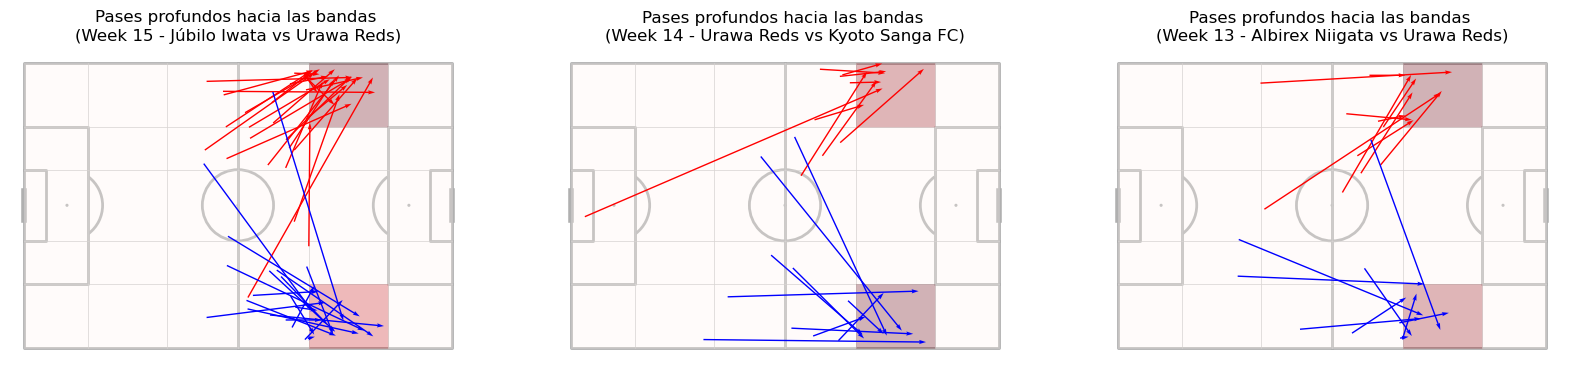

In [12]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 15))

for i in [1,2,3]:
    deep_prog_pass = table_events[(table_events['type.name']=='Pass') & (table_events['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & (table_events['x']<80) & (table_events['pass_endx']>80)]
    deep_prog_pass_opp = deep_prog_pass[(deep_prog_pass['team.id']==id_oppteam)&(deep_prog_pass['match_week']==id_round-i)].reset_index(drop=True)

    df_pass = deep_prog_pass_opp[(deep_prog_pass_opp['pass_endx'].between(80,102))&(deep_prog_pass_opp['pass_endy'].between(0,18))].reset_index(drop=True)
    df_pass2 = deep_prog_pass_opp[(deep_prog_pass_opp['pass_endx'].between(80,102))&(deep_prog_pass_opp['pass_endy'].between(62,80))].reset_index(drop=True)
    df_both = pd.concat([df_pass,df_pass2])

    pitch = Pitch()
    pitch.draw(axs[i-1],figsize=(15, 10))

    bin_x = np.sort(np.array([0,18,40,60,80,102,120]))
    bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,pitch.dim.penalty_area_bottom,
                              pitch.dim.penalty_area_top,pitch.dim.six_yard_top, pitch.dim.top]))
    bin_statistic = pitch.bin_statistic(df_both['pass_endx'],df_both['pass_endy'], 
                                        statistic='count',bins=(bin_x, bin_y), normalize=True)
    pitch.heatmap(bin_statistic, ax=axs[i-1], cmap='Reds', edgecolor='silver',linewidth=0.5,alpha=0.3)
    lc1 = pitch.arrows(df_pass['x'], df_pass['y'],
                      df_pass['pass_endx'], df_pass['pass_endy'],
                      width=1,
                      color='red', ax=axs[i-1])
    lc2 = pitch.arrows(df_pass2['x'], df_pass2['y'],
                      df_pass2['pass_endx'], df_pass2['pass_endy'],
                      width=1,
                      color='blue', ax=axs[i-1])
    axs[i-1].set_title('Pases profundos hacia las bandas \n({})'.format(deep_prog_pass_opp['fixture_name'][0]), fontsize=12)

plt.show()

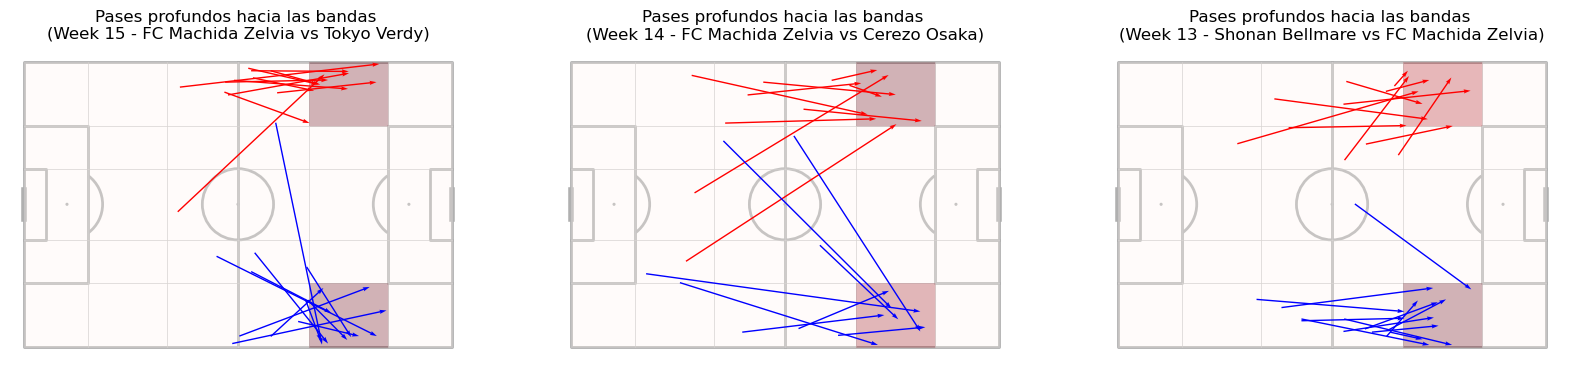

In [13]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 15))

for i in [1,2,3]:
    deep_prog_pass = table_events[(table_events['type.name']=='Pass') & (table_events['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & (table_events['x']<80) & (table_events['pass_endx']>80)]
    deep_prog_pass_opp = deep_prog_pass[(deep_prog_pass['team.id']==id_team)&(deep_prog_pass['match_week']==id_round-i)].reset_index(drop=True)

    df_pass = deep_prog_pass_opp[(deep_prog_pass_opp['pass_endx'].between(80,102))&(deep_prog_pass_opp['pass_endy'].between(0,18))].reset_index(drop=True)
    df_pass2 = deep_prog_pass_opp[(deep_prog_pass_opp['pass_endx'].between(80,102))&(deep_prog_pass_opp['pass_endy'].between(62,80))].reset_index(drop=True)
    df_both = pd.concat([df_pass,df_pass2])

    pitch = Pitch()
    pitch.draw(axs[i-1],figsize=(10, 10))

    bin_x = np.sort(np.array([0,18,40,60,80,102,120]))
    bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,pitch.dim.penalty_area_bottom,
                              pitch.dim.penalty_area_top,pitch.dim.six_yard_top, pitch.dim.top]))
    bin_statistic = pitch.bin_statistic(df_both['pass_endx'],df_both['pass_endy'], 
                                        statistic='count',bins=(bin_x, bin_y), normalize=True)
    pitch.heatmap(bin_statistic, ax=axs[i-1], cmap='Reds', edgecolor='silver',linewidth=0.5,alpha=0.3)
    lc1 = pitch.arrows(df_pass['x'], df_pass['y'],
                      df_pass['pass_endx'], df_pass['pass_endy'],
                      width=1,
                      color='red', ax=axs[i-1])
    lc2 = pitch.arrows(df_pass2['x'], df_pass2['y'],
                      df_pass2['pass_endx'], df_pass2['pass_endy'],
                      width=1,
                      color='blue', ax=axs[i-1])
    axs[i-1].set_title('Pases profundos hacia las bandas \n({})'.format(deep_prog_pass_opp['fixture_name'][0]), fontsize=12)

plt.show()

Ahora miremos como se asocian los jugadores para construir juego:

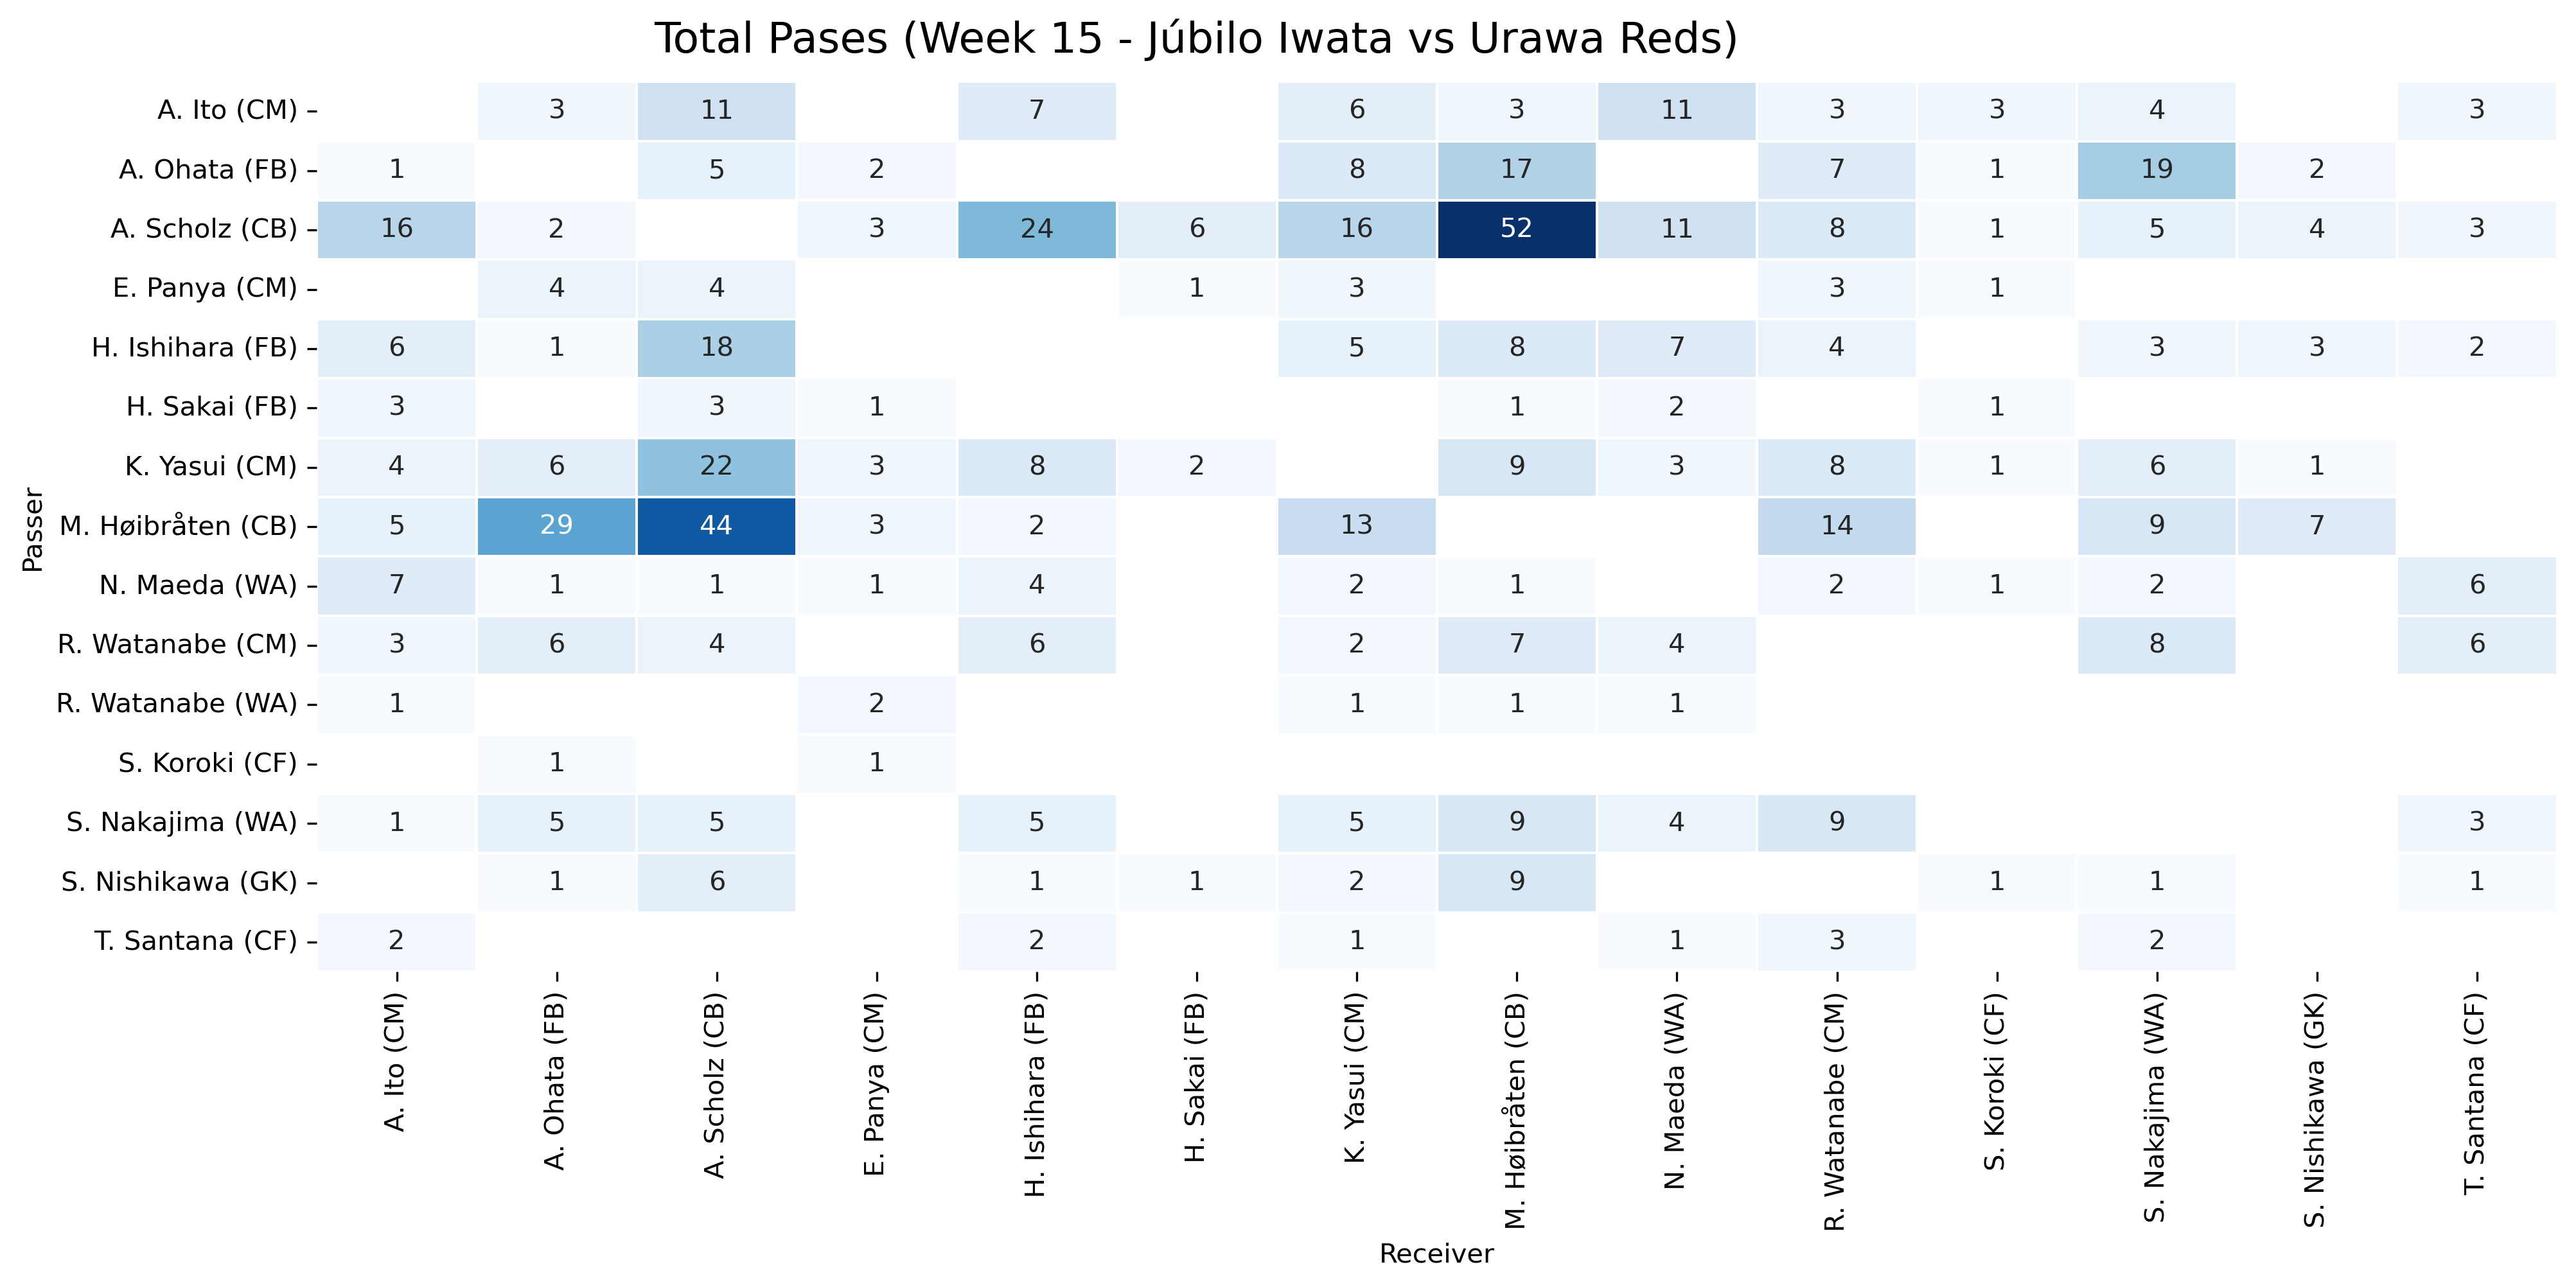

In [15]:
game_last = table_events[(table_events['match_week']==id_round-1) & (table_events['team.id']==id_oppteam)].reset_index(drop=True)
table_pass = game_last[(game_last['type.name']=='Pass')& (game_last['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False)].reset_index(drop=True)
pos_player = game_last.groupby('player.name').agg({'group_position_ab': lambda x: x.value_counts().index[0]}).reset_index()
pos_player = pos_player.rename(columns={'player.name':'pass.recipient.name','group_position_ab':'group_position_rec'})
table_pass = pd.merge(table_pass,pos_player, on='pass.recipient.name',how='left')
matrix_pass = table_pass.groupby(['player.name','group_position_ab','pass.recipient.name','group_position_rec']).agg({'id':'nunique'}).rename(columns={'id':'Total Passes'}).reset_index()


matrix_pass['last_name_passer'] = matrix_pass['player.name'].str.split().str[0].str[:1]+'. '+matrix_pass['player.name'].str.split().str[-1] +' ('+matrix_pass['group_position_ab']+')'
matrix_pass['last_name_receiver'] = matrix_pass['pass.recipient.name'].str.split().str[0].str[:1]+'. '+matrix_pass['pass.recipient.name'].str.split().str[-1] +' ('+matrix_pass['group_position_rec']+')'

x = matrix_pass.pivot(index='last_name_passer', columns='last_name_receiver', values='Total Passes')
plt.figure(figsize=(15,6),dpi=300)
plot = sns.heatmap(x,annot=True, cmap="Blues",linewidth=.5,cbar=False)
plot.set(xlabel="Receiver", ylabel="Passer")
plot.text(x=5.5, y=-0.7, s='Total Pases ({})'.format(game_last['fixture_name'].to_list()[0]), va='center', ha='center',size=16)
plt.show()

In [ ]:
game_last = table_events[(table_events['match_week']==id_round-1) & (table_events['team.id']==id_oppteam)].reset_index(drop=True)
table_pass = game_last[(game_last['type.name']=='Pass') & (game_last['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & (game_last['pass_endx'] - game_last['x']>10)].reset_index(drop=True)
pos_player = game_last.groupby('player.name').agg({'group_position_ab': lambda x: x.value_counts().index[0]}).reset_index()
pos_player = pos_player.rename(columns={'player.name':'pass.recipient.name','group_position_ab':'group_position_rec'})
table_pass = pd.merge(table_pass,pos_player, on='pass.recipient.name',how='left')
matrix_pass = table_pass.groupby(['player.name','group_position_ab','pass.recipient.name','group_position_rec']).agg({'id':'nunique'}).rename(columns={'id':'Total Passes'}).reset_index()


matrix_pass['last_name_passer'] = matrix_pass['player.name'].str.split().str[0].str[:1]+'. '+matrix_pass['player.name'].str.split().str[-1] +' ('+matrix_pass['group_position_ab']+')'
matrix_pass['last_name_receiver'] = matrix_pass['pass.recipient.name'].str.split().str[0].str[:1]+'. '+matrix_pass['pass.recipient.name'].str.split().str[-1] +' ('+matrix_pass['group_position_rec']+')'

x = matrix_pass.pivot(index='last_name_passer', columns='last_name_receiver', values='Total Passes')
plt.figure(figsize=(15,8),dpi=300)
plot = sns.heatmap(x,annot=True, cmap="Blues",linewidth=.5,cbar=False)
plot.set(xlabel="Receiver", ylabel="Passer")
plot.text(x=5.5, y=-0.7, s='Pases Progresivos ({})'.format(game_last['fixture_name'].to_list()[0]), va='center', ha='center',size=16)
plt.show()

In [ ]:
game_last = table_events[(table_events['match_week']==id_round-2) & (table_events['team.id']==id_oppteam)].reset_index(drop=True)
table_pass = game_last[(game_last['type.name']=='Pass') & (game_last['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & (game_last['pass_endx'] - game_last['x']>10)].reset_index(drop=True)
pos_player = game_last.groupby('player.name').agg({'group_position_ab': lambda x: x.value_counts().index[0]}).reset_index()
pos_player = pos_player.rename(columns={'player.name':'pass.recipient.name','group_position_ab':'group_position_rec'})
table_pass = pd.merge(table_pass,pos_player, on='pass.recipient.name',how='left')
matrix_pass = table_pass.groupby(['player.name','group_position_ab','pass.recipient.name','group_position_rec']).agg({'id':'nunique'}).rename(columns={'id':'Total Passes'}).reset_index()


matrix_pass['last_name_passer'] = matrix_pass['player.name'].str.split().str[0].str[:1]+'. '+matrix_pass['player.name'].str.split().str[-1] +' ('+matrix_pass['group_position_ab']+')'
matrix_pass['last_name_receiver'] = matrix_pass['pass.recipient.name'].str.split().str[0].str[:1]+'. '+matrix_pass['pass.recipient.name'].str.split().str[-1] +' ('+matrix_pass['group_position_rec']+')'

x = matrix_pass.pivot(index='last_name_passer', columns='last_name_receiver', values='Total Passes')
plt.figure(figsize=(15,8),dpi=300)
plot = sns.heatmap(x,annot=True, cmap="Blues",linewidth=.5,cbar=False)
plot.set(xlabel="Receiver", ylabel="Passer")
plot.text(x=5.5, y=-0.7, s='Pases Progresivos ({})'.format(game_last['fixture_name'].to_list()[0]), va='center', ha='center',size=16)
plt.show()

## Como ingresa al área rival?

In [ ]:
df = table_events.copy()
metricas_pp = pd.DataFrame({
    'match_id' : df['match_id'],
    'team.id' : df['team.id'],
    'team.name' : df['team.name'],
    'OP Pass Final Third' : (df['type.name']=='Pass') & (df['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & (df['x']>=80),
    'Carries Final Third' : (df['type.name']=='Carry') & (df['x']>=80), 
    'Progressive Carries Final Third' : (df['type.name']=='Carry') & (df['x']>=80) & (df['carry_endx']-df['x']>5), 
    'Dribbles Final Third' : (df['type.name']=='Dribble')  & (df['x']>=80), 
    'Box Entries by OP Pass':(df['type.name']=='Pass') & (df['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & ((df['x']<102)|((df['x']>=102)&(df['y']<18))|((df['x']>=102)&(df['y']>62))) & (df['pass_endx']>=102) & (df['pass_endy'].between(18,62)),
    'Box Entries by OP Throughballs': (df['type.name']=='Pass') & (df['pass.technique.name']=='Through Ball') & (df['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & ((df['x']<102)|((df['x']>=102)&(df['y']<18))|((df['x']>=102)&(df['y']>62))) & (df['pass_endx']>=102) & (df['pass_endy'].between(18,62)),
    'Box Entries by OP Long Balls': (df['type.name']=='Pass') & (df['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & (df['pass.height.name']=='High Pass') & (df['x']<80) & (df['pass_endx']>=102) & (df['pass_endy'].between(18,62)),
    'Box Entries by OP Cross': (df['type.name']=='Pass') & (df['pass.cross']==True) & (df['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & ((df['x']<102)|((df['x']>=102)&(df['y']<18))|((df['x']>=102)&(df['y']>62))) & (df['pass_endx']>=102) & (df['pass_endy'].between(18,62)),
    'Box Entries by OP High Cross': (df['type.name']=='Pass') & (df['pass.cross']==True) & (df['pass.height.name'].isin(['High Pass'])) & (df['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & ((df['x']<102)|((df['x']>=102)&(df['y']<18))|((df['x']>=102)&(df['y']>62))) & (df['pass_endx']>=102) & (df['pass_endy'].between(18,62)),
    'Box Entries by OP Ground Cross': (df['type.name']=='Pass') & (df['pass.cross']==True) & (df['pass.height.name'].isin(['Low Pass','Ground Pass'])) & (df['pass.type.name'].isin(['Kick Off','Throw-in','Free Kick','Goal Kick','Corner'])==False) & ((df['x']<102)|((df['x']>=102)&(df['y']<18))|((df['x']>=102)&(df['y']>62))) & (df['pass_endx']>=102) & (df['pass_endy'].between(18,62)),
    'Box Entries by Carry':(df['type.name']=='Carry') & ((df['x']<102)|((df['x']>=102)&(df['y']<18))|((df['x']>=102)&(df['y']>62))) & (df['carry_endx']>=102) & (df['carry_endy'].between(18,62)),          
})
## Numero de partidos
metricas_n = metricas_pp[['team.id','team.name','match_id']].groupby(['team.id','team.name'])['match_id'].nunique().reset_index().rename(columns={'match_id':'Games'})

## Métricas agrgadas por partido
metricas_sum = metricas_pp.drop(columns='match_id').groupby(['team.id','team.name']).sum().reset_index()

metricas_final = pd.merge(metricas_n,metricas_sum,on=['team.id','team.name'],how='left')
metricas_final

In [ ]:
metricas_final['OP Pass Final Third p90'] = metricas_final['OP Pass Final Third']/metricas_final['Games']
metricas_final['Box Entries (%)'] = (metricas_final['Box Entries by OP Pass']+metricas_final['Box Entries by Carry'])/metricas_final['OP Pass Final Third']
metricas_final['Progressive Carries Final Third (%)'] = metricas_final['Progressive Carries Final Third']/metricas_final['Carries Final Third']
metricas_final['Dribbles Final Third p90'] = metricas_final['Dribbles Final Third']/metricas_final['Games']
metricas_final['Box Entries by OP Throughballs (%)'] = metricas_final['Box Entries by OP Throughballs']/(metricas_final['Box Entries by OP Pass']+metricas_final['Box Entries by Carry'])
metricas_final['Box Entries by OP Long Balls (%)'] = metricas_final['Box Entries by OP Long Balls']/(metricas_final['Box Entries by OP Pass']+metricas_final['Box Entries by Carry'])
metricas_final['Box Entries by OP Cross (%)'] = metricas_final['Box Entries by OP Cross']/(metricas_final['Box Entries by OP Pass']+metricas_final['Box Entries by Carry'])
metricas_final['Box Entries by OP High Cross (%)'] = metricas_final['Box Entries by OP High Cross']/(metricas_final['Box Entries by OP Pass']+metricas_final['Box Entries by Carry'])
metricas_final['Box Entries by OP Ground Cross (%)'] = metricas_final['Box Entries by OP Ground Cross']/(metricas_final['Box Entries by OP Pass']+metricas_final['Box Entries by Carry'])
metricas_final['Box Entries by Carries (%)'] = metricas_final['Box Entries by Carry']/(metricas_final['Box Entries by OP Pass']+metricas_final['Box Entries by Carry'])

metricas_final

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(15, 6))

fig.suptitle('Es paciente en el ultimo tercio?',size=18)

column = 'OP Pass Final Third p90'

df = metricas_final.copy()
df = df.sort_values(column,ascending=False).reset_index(drop=True)
df['team_Opp'] = np.where(df['team.id']==id_oppteam,'Opp',
                          np.where(df['team.id']==id_team,'Team','Other'))
palette_custom = {'Other':'lightgray','Opp':'orange','Team':'steelblue'}

plot_avg = sns.barplot(x=df[column], y=df['team.name'],hue=df['team_Opp'],legend=False,palette=palette_custom,ax=axes[0])
for i in range(len(plot_avg.containers)):
    plot_avg.bar_label(plot_avg.containers[i],fmt='%.0f')
plot_avg.set(ylabel='',xlim=(0,df[column].max()*1.50))
plot_avg.axvline(x=df[column].mean(), linestyle='--',color='steelblue')

column = 'Box Entries (%)'

df = metricas_final.copy()
df = df.sort_values(column,ascending=False).reset_index(drop=True)
df['team_Opp'] = np.where(df['team.id']==id_oppteam,'Opp',
                          np.where(df['team.id']==id_team,'Team','Other'))
palette_custom = {'Other':'lightgray','Opp':'orange','Team':'steelblue'}

plot_avg = sns.barplot(x=df[column]*100, y=df['team.name'],hue=df['team_Opp'],legend=False,palette=palette_custom,ax=axes[1])
for i in range(len(plot_avg.containers)):
    plot_avg.bar_label(plot_avg.containers[i],fmt='%.1f%%')
plot_avg.set(ylabel='',xlim=(0,df[column].max()*150))
plot_avg.axvline(x=df[column].mean()*100, linestyle='--',color='steelblue')

fig.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3,figsize=(20, 8))

fig.suptitle('Como ingresa al area rival?',size=18)

column = 'Box Entries by OP Throughballs (%)'

df = metricas_final.copy()
df = df.sort_values(column,ascending=False).reset_index(drop=True)
df['team_Opp'] = np.where(df['team.id']==id_oppteam,'Opp',
                          np.where(df['team.id']==id_team,'Team','Other'))
palette_custom = {'Other':'lightgray','Opp':'orange','Team':'steelblue'}

plot_avg = sns.barplot(x=df[column]*100, y=df['team.name'],hue=df['team_Opp'],legend=False,palette=palette_custom,ax=axes[0])
for i in range(len(plot_avg.containers)):
    plot_avg.bar_label(plot_avg.containers[i],fmt='%.1f%%')
plot_avg.set(ylabel='',xlim=(0,df[column].max()*150))
plot_avg.axvline(x=df[column].mean()*100, linestyle='--',color='steelblue')

column = 'Box Entries by OP Cross (%)'

df = metricas_final.copy()
df = df.sort_values(column,ascending=False).reset_index(drop=True)
df['team_Opp'] = np.where(df['team.id']==id_oppteam,'Opp',
                          np.where(df['team.id']==id_team,'Team','Other'))
palette_custom = {'Other':'lightgray','Opp':'orange','Team':'steelblue'}

plot_avg = sns.barplot(x=df[column]*100, y=df['team.name'],hue=df['team_Opp'],legend=False,palette=palette_custom,ax=axes[1])
for i in range(len(plot_avg.containers)):
    plot_avg.bar_label(plot_avg.containers[i],fmt='%.1f%%')
plot_avg.set(ylabel='',xlim=(0,df[column].max()*150))
plot_avg.axvline(x=df[column].mean()*100, linestyle='--',color='steelblue')

column = 'Box Entries by Carries (%)'

df = metricas_final.copy()
df = df.sort_values(column,ascending=False).reset_index(drop=True)
df['team_Opp'] = np.where(df['team.id']==id_oppteam,'Opp',
                          np.where(df['team.id']==id_team,'Team','Other'))
palette_custom = {'Other':'lightgray','Opp':'orange','Team':'steelblue'}

plot_avg = sns.barplot(x=df[column]*100, y=df['team.name'],hue=df['team_Opp'],legend=False,palette=palette_custom,ax=axes[2])
for i in range(len(plot_avg.containers)):
    plot_avg.bar_label(plot_avg.containers[i],fmt='%.1f%%')
plot_avg.set(ylabel='',xlim=(0,df[column].max()*150))
plot_avg.axvline(x=df[column].mean()*100, linestyle='--',color='steelblue')

fig.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(15, 6))

fig.suptitle('Que tipo de centros?',size=18)

column = 'Box Entries by OP High Cross (%)'

df = metricas_final.copy()
df = df.sort_values(column,ascending=False).reset_index(drop=True)
df['team_Opp'] = np.where(df['team.id']==id_oppteam,'Opp',
                          np.where(df['team.id']==id_team,'Team','Other'))
palette_custom = {'Other':'lightgray','Opp':'orange','Team':'steelblue'}

plot_avg = sns.barplot(x=df[column]*100, y=df['team.name'],hue=df['team_Opp'],legend=False,palette=palette_custom,ax=axes[0])
for i in range(len(plot_avg.containers)):
    plot_avg.bar_label(plot_avg.containers[i],fmt='%.1f%%')
plot_avg.set(ylabel='',xlim=(0,df[column].max()*150))
plot_avg.axvline(x=df[column].mean()*100, linestyle='--',color='steelblue')

column = 'Box Entries by OP Ground Cross (%)'

df = metricas_final.copy()
df = df.sort_values(column,ascending=False).reset_index(drop=True)
df['team_Opp'] = np.where(df['team.id']==id_oppteam,'Opp',
                          np.where(df['team.id']==id_team,'Team','Other'))
palette_custom = {'Other':'lightgray','Opp':'orange','Team':'steelblue'}

plot_avg = sns.barplot(x=df[column]*100, y=df['team.name'],hue=df['team_Opp'],legend=False,palette=palette_custom,ax=axes[1])
for i in range(len(plot_avg.containers)):
    plot_avg.bar_label(plot_avg.containers[i],fmt='%.1f%%')
plot_avg.set(ylabel='',xlim=(0,df[column].max()*150))
plot_avg.axvline(x=df[column].mean()*100, linestyle='--',color='steelblue')

fig.tight_layout()
plt.show()

In [ ]:
opp_events = table_events[table_events['team.id']==id_oppteam].reset_index(drop=True)

events_focus = opp_events[((opp_events['type.name']=='Pass') & (opp_events['pass.type.name'].isin(['Kick Off','Free Kick','Corner','Throw-in','Goal Kick'])==False))&(opp_events['x']>80)&(((opp_events['x']>=102)&(opp_events['y']<18)&(opp_events['pass_endx']>=102)&(opp_events['pass_endy'].between(18,62)))|((opp_events['x']>=102)&(opp_events['y']>62)&(opp_events['pass_endx']>=102)&(opp_events['pass_endy'].between(18,62)))|((opp_events['x']<102)&(opp_events['pass_endx']>=102)&(opp_events['pass_endy'].between(18,62))))].reset_index(drop=True)

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='w', line_color='black',half=True,
                     line_zorder=2)

fig, ax = pitch.draw(figsize=(15, 10))
plot_title = 'Box Entries by OP Pass - {}'.format(opp_events['team.name'][0])
bin_x = np.sort(np.array([80,102,120]))
bin_y = np.sort(np.array([0,18,30,50,62,80]))
stats = pitch.bin_statistic(events_focus['x'],events_focus['y'],statistic='count',bins=(bin_x, bin_y),normalize=True)
pitch.heatmap(stats, edgecolors='white',linewidth=0.6, cmap='Reds', alpha=0.5,zorder=10,ax=ax)
pitch.label_heatmap(stats,ax=ax, ha='center', va='center',str_format='{:.1%}',fontsize=12)

pitch.scatter(events_focus['x'],events_focus['y'], ax=ax, color='grey', s=10)
ax.text(x=40, y=122, s=plot_title, va='center', ha='center',size=20)
plt.show()

A veces puede mostrar que un equipo carga un lado, por ejemplo miremos a Machida:

In [ ]:
opp_events = table_events[table_events['team.id']==id_team].reset_index(drop=True)

events_focus = opp_events[((opp_events['type.name']=='Pass') & (opp_events['pass.type.name'].isin(['Kick Off','Free Kick','Corner','Throw-in','Goal Kick'])==False))&(opp_events['x']>80)&(((opp_events['x']>=102)&(opp_events['y']<18)&(opp_events['pass_endx']>=102)&(opp_events['pass_endy'].between(18,62)))|((opp_events['x']>=102)&(opp_events['y']>62)&(opp_events['pass_endx']>=102)&(opp_events['pass_endy'].between(18,62)))|((opp_events['x']<102)&(opp_events['pass_endx']>=102)&(opp_events['pass_endy'].between(18,62))))].reset_index(drop=True)

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='w', line_color='black',half=True,
                     line_zorder=2)

fig, ax = pitch.draw(figsize=(15, 10))
plot_title = 'Box Entries by OP Pass - {}'.format(opp_events['team.name'][0])
bin_x = np.sort(np.array([80,102,120]))
bin_y = np.sort(np.array([0,18,30,50,62,80]))
stats = pitch.bin_statistic(events_focus['x'],events_focus['y'],statistic='count',bins=(bin_x, bin_y),normalize=True)
pitch.heatmap(stats, edgecolors='white',linewidth=0.6, cmap='Reds', alpha=0.5,zorder=10,ax=ax)
pitch.label_heatmap(stats,ax=ax, ha='center', va='center',str_format='{:.1%}',fontsize=12)

pitch.scatter(events_focus['x'],events_focus['y'], ax=ax, color='grey', s=10)
ax.text(x=40, y=122, s=plot_title, va='center', ha='center',size=20)
plt.show()

En este caso, 40% por banda izquierda por 31% por banda derecha, mientras Urawa es mas un 30%-30%. Eso quiere decir que Urawa en el 40% de las veces ataca por el centro vs un 29% de Machida.  

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(25, 15))

for i, ax in zip([1, 2, 3], axs):

    # --- FILTRO COMPLETO DE PASES AL ÁREA ---
    box_entries = opp_events[
        (opp_events['type.name'] == 'Pass') &
        (~opp_events['pass.type.name'].isin(['Kick Off','Free Kick','Corner','Throw-in','Goal Kick'])) &
        (opp_events['x'] > 80) & (
            (
                (opp_events['x'] >= 102) &
                (opp_events['y'] < 18) &
                (opp_events['pass_endx'] >= 102) &
                (opp_events['pass_endy'].between(18, 62))
            ) |
            (
                (opp_events['x'] >= 102) &
                (opp_events['y'] > 62) &
                (opp_events['pass_endx'] >= 102) &
                (opp_events['pass_endy'].between(18, 62))
            ) |
            (
                (opp_events['x'] < 102) &
                (opp_events['pass_endx'] >= 102) &
                (opp_events['pass_endy'].between(18, 62))
            )
        ) &
        (opp_events['match_week'] == i)
    ].reset_index(drop=True)

    # --- SI NO HAY DATOS ---
    if box_entries.empty:
        ax.set_title(f"Pases al área — MW {i}\n(Sin datos)", fontsize=18)
        ax.axis("off")
        continue

    # --- PASES EXITOSOS E INEXITOSOS ---
    succ_pass = box_entries[box_entries['pass.outcome.name'].isna()]
    unsucc_pass = box_entries[box_entries['pass.outcome.name'].notna()]

    # --- PITCH ---
    pitch = Pitch()
    pitch.draw(ax=ax)

    pitch.arrows(
        succ_pass['x'], succ_pass['y'],
        succ_pass['pass_endx'], succ_pass['pass_endy'],
        width=1, color='green', ax=ax
    )

    pitch.arrows(
        unsucc_pass['x'], unsucc_pass['y'],
        unsucc_pass['pass_endx'], unsucc_pass['pass_endy'],
        width=1, color='brown', ax=ax
    )

    # --- TÍTULO SEGURO ---
    ax.set_title(
        f"Pases al área\n{box_entries['fixture_name'].iloc[0]}",
        fontsize=20
    )

plt.show()

Conclusiones del analisis:  

- Urawa es un equipo que tiene paciencia para construir juego desde atras. Es uno de los equipos que menos usa pelotazos, pases progresivos y pases profundos desde campo propio, mientras que es uno de los equipos que mas realiza pases en campo propio.
- A pesar de no realizar con frecuencia pases progresivos, cuando los hace es uno de los mas exitosos. Esto demuestra que el equipo es paciente para buscar la posibilidad de progresar, evitando asumir alto riesgo.
- Urawa suele progresar hacia el ultimo tercio con pases diagonales desde el centro hacia la banda. Esto se explica mejor al analizar la matriz de pases progresivos donde se observa que los centrales suelen buscar a los laterales y extremos.
- Ya en el ultimo tercio, es paciente, no se apresura para ingresar al area. De hecho, es el que menos utiliza centros para ingresar al area.
- Es uno de los equipos que mas utiliza los pases filtrados, los centros rastreros y los carreteos hacia el area, pero es el que menos utiliza centros aereos.
- Es uno de los equipos que mas ingresa al area rival a traves de pases desde el carril central.